In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
engine = 'Stockfish 13'
model = keras.models.load_model('../Models/SF_model_batch_32M')
engine_path = '/usr/local/bin/stockfish'

In [3]:
def plotPred (y_true, preds):
    ymin = np.min(y_true)
    ymax = np.max(y_true)
    plt.scatter(y_true, preds, label=f'score: {r2_score(y_true, preds)}')
    plt.plot([ymin, ymax], [ymin, ymax], '-.', color='red', label="predicted values = true values")
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    
def r2_score (y_true, preds):
    return 1 - (np.sum(np.square(preds - y_true)) / np.sum(np.square(preds - np.mean(preds))))

In [4]:
test_df = pd.read_csv('Datasets/' + engine + '/test_dataset.csv')
features = test_df.columns[:-1]
cps = test_df.columns[-1]

boards = test_df[features].values
scores = test_df[cps].values
print(boards.shape, scores.shape)
preds = model.predict(boards).flatten()

(1000000, 131) (1000000,)


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


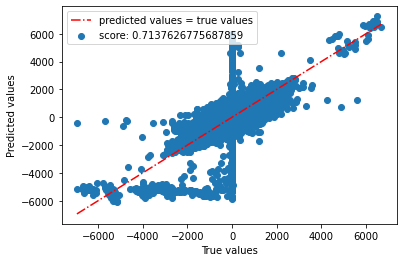

In [5]:
plotPred(scores, preds)

#### We test our model with some random positions.

r1b3k1/pp4p1/2p4p/3pR3/8/2P2P2/P1P2P1P/6K1 b - - 0 21
stockfish score: -490
pred score: -670


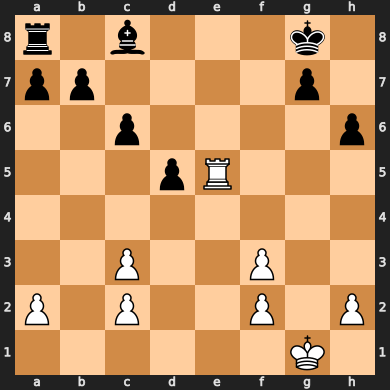

In [10]:
import sys
import chess
sys.path.insert(1, 'Classes/')
from dataset_utils import encodeBoard
from ScoreGetter import ScoreGetter

score_getter = ScoreGetter(engine_path, 'eval', 'go depth 1')

df = pd.read_csv('Datasets/raw_dataset.csv', nrows=10000)
fens = df['board'].values

fen = fens[np.random.randint(fens.shape[0])]
print(fen)
e = np.array(encodeBoard(fen)).reshape(1, -1)
print(f'stockfish score: {score_getter.getScore(fen)}')
print(f'pred score: {int(model.predict(e).flatten()[0])}')

chess.Board(fen)